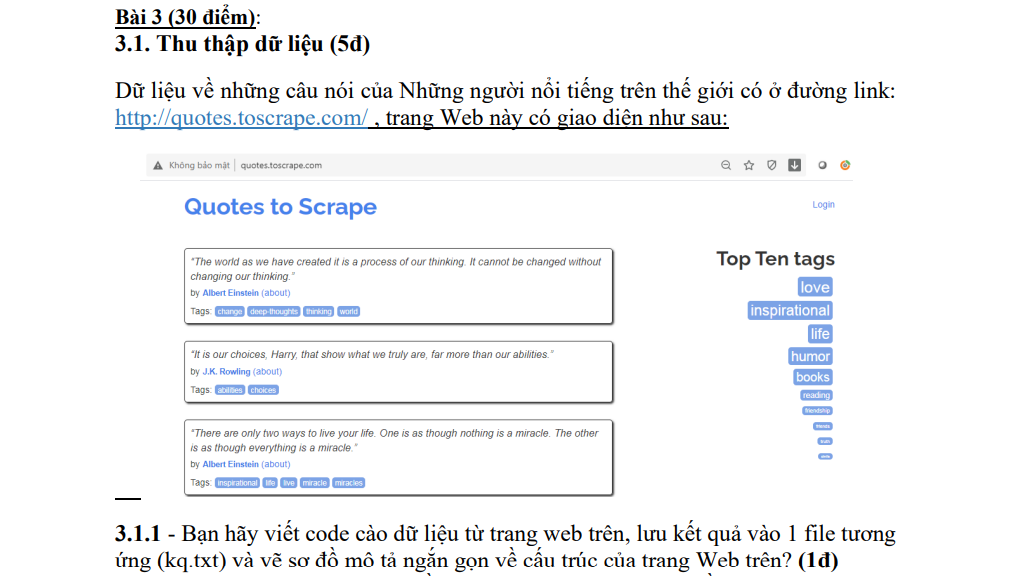

In [10]:
import requests
from bs4 import BeautifulSoup

base_url = "http://quotes.toscrape.com/"
url = base_url
with open('kq.txt', 'w', encoding='utf-8') as f:
    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            text = quote.find('span', class_='text').text
            author = quote.find('small', class_='author').text
            f.write(f'{text} - {author}\n')

        next_page = soup.find('li', class_='next')
        url = base_url + next_page.find('a')['href'] if next_page else None

print("Hoàn thành cào dữ liệu!")


Hoàn thành cào dữ liệu!


##### Mô tả ngắn gọn về cấu trúc trang web

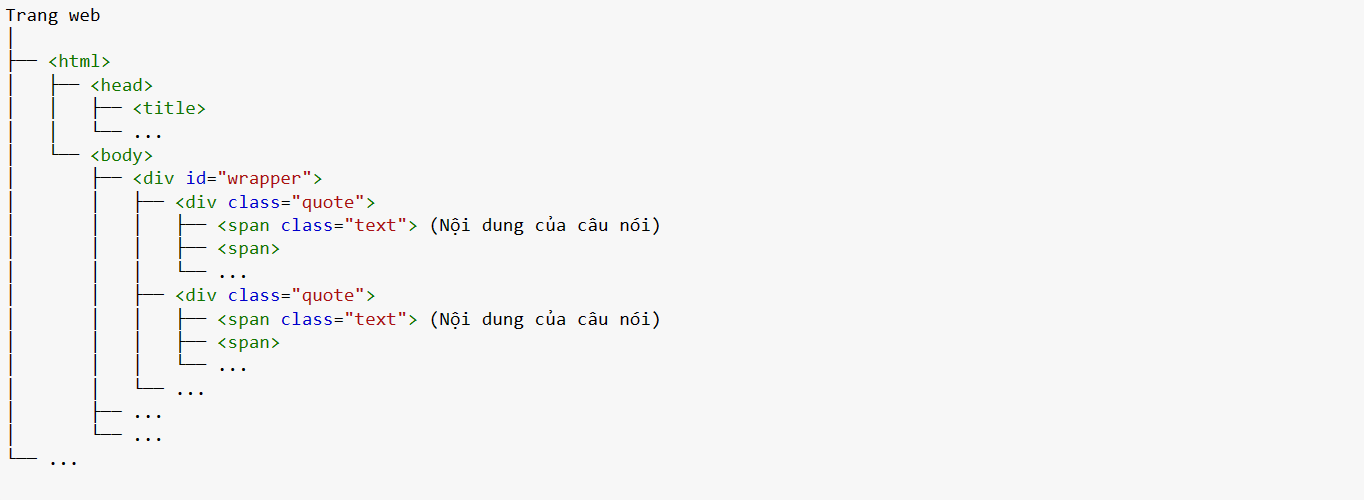

##### 3.1.2 
Với dữ liệu bạn vừa cào về, bạn hãy thực hiện các yêu cầu sau:  
- a. Hãy đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến 'result’,  
hiển thị giá trị biến 'result’ ra màn hình? (1đ)  

In [11]:
import requests
from bs4 import BeautifulSoup

url = "http://quotes.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

result = soup.find_all('div', class_='quote')

for quote in result:
    print(quote)


<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K. R

- b. Hãy tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với class
là "author" và in kết quả ra màn hình? (1đ)

In [12]:
for quote in result:
    author = quote.find('small', class_='author')
    print(author)


<small class="author" itemprop="author">Albert Einstein</small>
<small class="author" itemprop="author">J.K. Rowling</small>
<small class="author" itemprop="author">Albert Einstein</small>
<small class="author" itemprop="author">Jane Austen</small>
<small class="author" itemprop="author">Marilyn Monroe</small>
<small class="author" itemprop="author">Albert Einstein</small>
<small class="author" itemprop="author">André Gide</small>
<small class="author" itemprop="author">Thomas A. Edison</small>
<small class="author" itemprop="author">Eleanor Roosevelt</small>
<small class="author" itemprop="author">Steve Martin</small>


- c. Hãy viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả. Với mỗi tác giả in
ra màn hình các nội dung (1đ)  
✓ Tên tác giả  
✓ Đường link của tác giả  
✓ Ngày tháng năm sinh  
✓ Và câu nói nổi tiếng của tác giả  

In [17]:
import requests
from bs4 import BeautifulSoup
import csv

def tacgiaLink():
    base_url = "http://quotes.toscrape.com/"
    url = base_url
    data = []
    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            author_name = quote.find('small', class_='author').text
            author_link = base_url + quote.find('a')['href']
            author_response = requests.get(author_link)
            author_soup = BeautifulSoup(author_response.text, 'html.parser')
            author_birthday = author_soup.find('span', class_='author-born-date').text
            famous_quote = quote.find('span', class_='text').text
            data.append([author_name, author_link, author_birthday, famous_quote])

        next_page = soup.find('li', class_='next')
        url = base_url + next_page.find('a')['href'] if next_page else None
    return data

data = tacgiaLink()

- d. Hãy lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1  
dòng dữ liệu. Bạn được yêu cầu thu thập ít nhất 40 câu nói nổi tiếng từ trang  
web trên một cách tự động theo code của các ý trên? (1đ)   

In [18]:
with open('Quote.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Tên tác giả", "Đường link của tác giả", "Ngày tháng năm sinh", "Câu nói nổi tiếng của tác giả"])
    writer.writerows(data)


### 3.2. Khai phá dữ liệu (25 điểm)

###### 3.2.1. Xử lý dữ liệu- Data Imputation (2 điểm):
- Bạn hãy thêm vào Trường STT và điền tự động dữ liệu của trường này?
- Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?
- Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả? 

----------------------------------------------------

- Điền dữ liệu cho trường ngày sinh: Nếu một số giá trị của trường ngày sinh chưa có, một cách tiếp cận phổ biến là sử dụng phương pháp imputation để điền vào các giá trị bị thiếu. Tuy nhiên, vì ngày sinh là thông tin cụ thể và không thể dự đoán một cách chính xác, nên một cách tiếp cận phù hợp có thể là để giá trị này trống hoặc điền một giá trị mặc định như ‘Không rõ’.
- Thêm trường Tuổi và điền tuổi của các tác giả: Để thêm trường Tuổi, bạn cần biết năm hiện tại và năm sinh của tác giả. Tuy nhiên, vì dữ liệu này được thu thập từ trang web và không cung cấp thông tin về năm mất (nếu có) của tác giả, việc tính toán tuổi có thể không chính xác. Dưới đây là một cách để thêm trường Tuổi vào dữ liệu của bạn:

In [22]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime

def tacgiaLink():
    base_url = "http://quotes.toscrape.com/"
    url = base_url
    data = []
    stt = 1
    current_year = datetime.now().year
    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        quotes = soup.find_all('div', class_='quote')

        for quote in quotes:
            author_name = quote.find('small', class_='author').text
            author_link = base_url + quote.find('a')['href']
            author_response = requests.get(author_link)
            author_soup = BeautifulSoup(author_response.text, 'html.parser')
            author_birthday = author_soup.find('span', class_='author-born-date').text
            birth_year = int(author_birthday.split()[-1])
            age = current_year - birth_year
            famous_quote = quote.find('span', class_='text').text
            data.append([stt, author_name, author_link, author_birthday, famous_quote, age])
            stt += 1

        next_page = soup.find('li', class_='next')
        url = base_url + next_page.find('a')['href'] if next_page else None
    return data

data = tacgiaLink()

with open('Quote_2.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["STT", "Tên tác giả", "Đường link của tác giả", "Ngày tháng năm sinh", "Câu nói nổi tiếng của tác giả", "Tuổi"])
    writer.writerows(data)


##### 3.2.2. Khám phá dữ liệu- Data Exploration (10 điểm):
Bạn cần khám phá dữ liệu để hiển thị một số thông tin thống kê và phân tích của tập
dữ liệu đã cho. Chẳng hạn như:
- Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu,
- Thống kê về năm sinh và độ tuổi của các tác giả,
- Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …
- Thống kê về các từ được sử dụng trong các câu nói,
- Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng,
- Phân tích, trực quan mối quan hệ giữa các tác giả với nhau,…

In [24]:
#Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu,
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Quote_2.csv')

# Thống kê số lượng tác giả duy nhất
unique_authors = data['Tên tác giả'].nunique()
print(f'Số lượng tác giả duy nhất: {unique_authors}')

# Thống kê số lượng câu nói nổi tiếng duy nhất
unique_quotes = data['Câu nói nổi tiếng của tác giả'].nunique()
print(f'Số lượng câu nói nổi tiếng duy nhất: {unique_quotes}')

# Thống kê số lượng câu nói nổi tiếng trung bình mỗi tác giả
avg_quotes_per_author = data.groupby('Tên tác giả')['Câu nói nổi tiếng của tác giả'].count().mean()
print(f'Số lượng câu nói nổi tiếng trung bình mỗi tác giả: {avg_quotes_per_author}')


Số lượng tác giả duy nhất: 50
Số lượng câu nói nổi tiếng duy nhất: 100
Số lượng câu nói nổi tiếng trung bình mỗi tác giả: 2.0


In [25]:
#Thống kê về năm sinh và độ tuổi của các tác giả,

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Quote.csv')

# Chuyển đổi trường 'Ngày tháng năm sinh' thành định dạng datetime
data['Ngày tháng năm sinh'] = pd.to_datetime(data['Ngày tháng năm sinh'], errors='coerce')

# Tạo trường 'Năm sinh' dựa trên trường 'Ngày tháng năm sinh'
data['Năm sinh'] = data['Ngày tháng năm sinh'].dt.year

# Thống kê về năm sinh
print('Thống kê về năm sinh:')
print(data['Năm sinh'].describe())

# Thống kê về độ tuổi
print('\nThống kê về độ tuổi:')
print(data['Tuổi'].describe())


Thống kê về năm sinh:
count     100.000000
mean     1899.670000
std        50.710518
min      1775.000000
25%      1879.000000
50%      1904.000000
75%      1940.500000
max      1973.000000
Name: Năm sinh, dtype: float64

Thống kê về độ tuổi:
count    100.000000
mean     124.330000
std       50.710518
min       51.000000
25%       83.500000
50%      120.000000
75%      145.000000
max      249.000000
Name: Tuổi, dtype: float64


In [26]:
#Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Quote.csv')

# Tạo trường 'Số từ' dựa trên trường 'Câu nói nổi tiếng của tác giả'
data['Số từ'] = data['Câu nói nổi tiếng của tác giả'].apply(lambda x: len(x.split()))

# Tìm câu dài nhất
longest_quote = data['Câu nói nổi tiếng của tác giả'].str.len().idxmax()
print('Câu dài nhất:')
print(data.loc[longest_quote, 'Câu nói nổi tiếng của tác giả'])

# Tìm câu ngắn nhất
shortest_quote = data['Câu nói nổi tiếng của tác giả'].str.len().idxmin()
print('\nCâu ngắn nhất:')
print(data.loc[shortest_quote, 'Câu nói nổi tiếng của tác giả'])

# Thống kê về số từ
print('\nThống kê về số từ:')
print(data['Số từ'].describe())


Câu dài nhất:
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and mos

In [27]:
#Thống kê về các từ được sử dụng trong các câu nói,
from collections import Counter
import re

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Quote.csv')

# Tạo một Counter để đếm số lần xuất hiện của mỗi từ
word_counter = Counter()

# Duyệt qua tất cả các câu nói
for quote in data['Câu nói nổi tiếng của tác giả']:
    # Loại bỏ dấu câu và chuyển tất cả các từ về dạng chữ thường
    words = re.findall(r'\b\w+\b', quote.lower())
    word_counter.update(words)

# In ra số lần xuất hiện của mỗi từ
for word, count in word_counter.most_common():
    print(f'{word}: {count}')


you: 103
the: 75
to: 75
is: 69
a: 69
it: 58
i: 58
of: 49
and: 48
not: 36
be: 32
that: 31
in: 26
but: 26
love: 23
can: 21
if: 21
t: 20
s: 19
your: 18
who: 18
will: 18
have: 17
what: 17
are: 17
one: 15
all: 15
as: 14
for: 14
up: 14
never: 13
with: 13
she: 13
my: 13
we: 12
life: 12
or: 12
no: 12
her: 12
think: 12
more: 11
there: 11
when: 11
do: 11
only: 10
make: 10
so: 10
than: 9
like: 9
don: 9
because: 9
from: 9
good: 8
them: 8
me: 8
live: 7
just: 7
know: 7
day: 7
re: 7
going: 7
some: 7
give: 7
at: 7
keep: 7
may: 7
people: 7
time: 7
book: 7
see: 7
world: 6
our: 6
without: 6
has: 6
how: 6
truth: 6
friends: 6
ll: 6
remember: 6
go: 6
on: 6
read: 6
an: 6
everything: 5
person: 5
must: 5
man: 5
get: 5
they: 5
come: 5
let: 5
much: 5
doesn: 5
believe: 5
yourself: 5
thing: 5
about: 5
great: 5
every: 5
us: 5
way: 5
by: 5
things: 5
lives: 5
really: 5
am: 5
m: 5
thinking: 4
nothing: 4
become: 4
this: 4
best: 4
well: 4
too: 4
find: 4
makes: 4
always: 4
else: 4
hurt: 4
opposite: 4
indifference: 4
happ

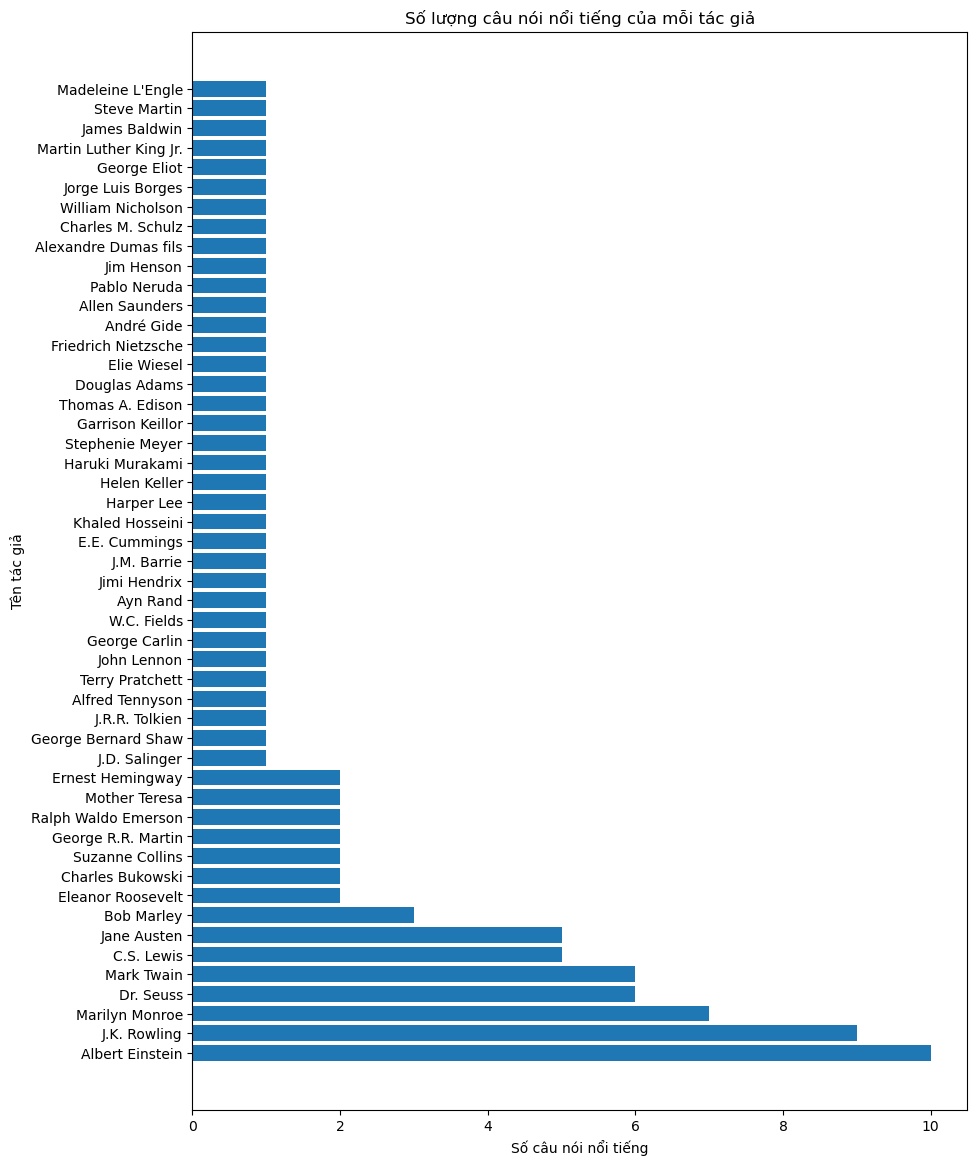

In [35]:
#Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('Quote_2.csv')

# Tạo một DataFrame mới chứa số lượng câu nói nổi tiếng của mỗi tác giả
author_quote_counts = data['Tên tác giả'].value_counts().reset_index()
author_quote_counts.columns = ['Tên tác giả', 'Số câu nói nổi tiếng']

# Vẽ biểu đồ cột để trực quan hóa số lượng câu nói nổi tiếng của mỗi tác giả
plt.figure(figsize=(10, 14))
plt.barh(author_quote_counts['Tên tác giả'], author_quote_counts['Số câu nói nổi tiếng'])
plt.xlabel('Số câu nói nổi tiếng')
plt.ylabel('Tên tác giả')
plt.title('Số lượng câu nói nổi tiếng của mỗi tác giả')
plt.show()


##### 3.2.3. Trích xuất đặc trưng- Feature Extraction (3 điểm):  
Hãy đề xuất cách trích xuất đặc trưng từ bộ dữ liệu đã cho, cung cấp lý do và giải  
thích cách làm của bạn.  

- Tên tác giả: Tên tác giả có thể được mã hóa thành dạng số để sử dụng trong mô hình học máy. Một phương pháp phổ biến là sử dụng mã hóa one-hot, tạo ra một vectơ với độ dài bằng số lượng tác giả duy nhất và chỉ có một giá trị là 1 tại vị trí tương ứng với tác giả đó.
- Ngày tháng năm sinh: Có thể tạo ra các đặc trưng mới như “Tháng sinh”, “Ngày sinh” và “Năm sinh”. Ngoài ra, có thể tính toán “Tuổi” dựa trên “Năm sinh” nếu dữ liệu được cập nhật liên tục.
- Câu nói nổi tiếng của tác giả: Có thể sử dụng các phương pháp xử lý ngôn ngữ tự nhiên (NLP) để trích xuất đặc trưng từ văn bản. Ví dụ, TF-IDF (Term Frequency-Inverse Document Frequency) để đánh giá tầm quan trọng của một từ trong câu nói hoặc Word2Vec để biểu diễn từ dưới dạng vectơ số.
- Tuổi: Đây là một đặc trưng số và có thể được sử dụng trực tiếp trong mô hình học máy.